Μάθημα: Αναγνώριση Προτύπων - Μηχανική Μάθηση
Εργασία: 2η Εργασία
Ονοματεπώνυμο: Κωνσταντίνος Κίτσος
Α.Μ. : 1115201900082

# Ερώτημα 1: Αναγνώριση Προσώπων (Face recognition)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from PIL import Image
import numpy as np
from numpy import asarray
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#I)

In [3]:
#directory = '/content/drive/MyDrive/Anagnorisi Protypon - Machine Learning/Ergasia2/faces'

def loadImages(path, set_number):

#min and max acceptable lighting   
  if(set_number=="Set_1"):
    min =1
    max=7
  elif(set_number=="Set_2"):
    min =8
    max=19
  elif(set_number=="Set_3"):
    min=20
    max=31
  elif(set_number=="Set_4"):
    min =32
    max =45
  else:
    min =46
    max =64
  
#initializations
  X= np.zeros(shape=( 2500,(max-min+1)*10))
  labels=[]
  count=0

  for fname in os.listdir(path):
    fullname = os.path.join(path, fname)

    if os.path.isfile(fullname): # checking if it is a file - NOT IMPORTANT

        light_type=int(fullname[-6])*10+int(fullname[-5]) 
                                              # lightning is reported right before ".png" int the 5th and 6th from last positions
        person_label=int(fullname[-9])*10+int(fullname[-8])       # simirarly


        if(light_type >=min and light_type <=max):  # check if lighting is of wanted set
          img = mpimg.imread(fullname)                         #read image
          img_vector=img.flatten()                            # reshape to 2500 instead of (50,50)
          X[:,count]=img_vector
          labels.append(person_label)
          count+=1                             

  return X,labels       

In [4]:
[X,y]=loadImages("/content/drive/MyDrive/Anagnorisi Protypon - Machine Learning/Ergasia2/faces","Set_1")

[X2,y2]=loadImages("/content/drive/MyDrive/Anagnorisi Protypon - Machine Learning/Ergasia2/faces","Set_2")
[X3,y3]=loadImages("/content/drive/MyDrive/Anagnorisi Protypon - Machine Learning/Ergasia2/faces","Set_3")
[X4,y4]=loadImages("/content/drive/MyDrive/Anagnorisi Protypon - Machine Learning/Ergasia2/faces","Set_4")
[X5,y5]=loadImages("/content/drive/MyDrive/Anagnorisi Protypon - Machine Learning/Ergasia2/faces","Set_5")

#ΙΙ)

Παρατηρηση: Επειδή η υλόποιηση της  PCA από την  sklearn αντιμετωπίζει τις γραμμές και όχι της στήλες ως τα χαρακτηριστικά του dataset(χαρακτηριστικά με βάση τα οποία γίνεται η μείωση διαστάσεων) βολεύει περισσότερο τα διανύσματα εικόνων να αποτελούν τις γραμμές 

In [5]:
if (X.shape[0]==2500): 
  X=X.T

if (X2.shape[0]==2500): 
  X2=X2.T
if (X3.shape[0]==2500): 
  X3=X3.T
if (X4.shape[0]==2500): 
  X4=X4.T
if (X5.shape[0]==2500): 
  X5=X5.T

print("X got inverted,new dimensions: ",X.shape)

X got inverted,new dimensions:  (70, 2500)


#PCA

In [6]:
#PCA

from sklearn.decomposition import PCA

pca_9 = PCA(n_components=9)
pca_30= PCA(n_components=30)

# Step 2 
X_in9   =pca_9.fit_transform(X) # X_in9 is X(Set1) in lower dimensionality
X_in30  = pca_30.fit_transform(X)

print('Set 1 in the pca_9 eigenspace - shape: ',X_in9.shape)
print('Set 1 in the pca_30 eigenspace -shape: ',X_in30.shape)

Set 1 in the pca_9 eigenspace - shape:  (70, 9)
Set 1 in the pca_30 eigenspace -shape:  (70, 30)


#NearestNeighbor

In [7]:
# d=9

from sklearn.neighbors import KNeighborsClassifier
indexes=np.arange(70)
neigh9 = KNeighborsClassifier(n_neighbors=1,metric='euclidean')
neigh9.fit(X_in9,y)

neigh30 = KNeighborsClassifier(n_neighbors=1,metric='euclidean')
neigh30.fit(X_in30,y)


KNeighborsClassifier(metric='euclidean', n_neighbors=1)

#Επιδόσεις

In [8]:
def classification_score(X,y,pca,neigh):
  X_transformed=pca.transform(X)
  return neigh.score(X_transformed,y)

pca=pca_9
neigh=neigh9

scores_9=[]
for Set, labels in zip( [X,X2,X3,X4,X5], [y,y2,y3,y4,y5]):
  scores_9.append(classification_score(Set,labels,pca,neigh))

print("d=9:")
print(scores_9)

d=9:
[1.0, 0.9, 0.425, 0.2, 0.14736842105263157]


In [9]:
pca=pca_30
neigh=neigh30

scores_30=[]
for Set, labels in zip( [X,X2,X3,X4,X5], [y,y2,y3,y4,y5]):
  scores_30.append(classification_score(Set,labels,pca,neigh))

print("d=30:")
print(scores_30)

d=30:
[1.0, 0.9416666666666667, 0.5083333333333333, 0.2, 0.14736842105263157]


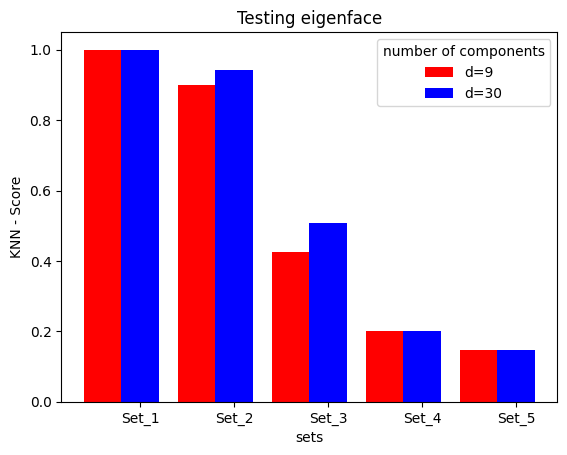

In [10]:
x = np.arange(5)
width = 0.4

plt.bar(x-0.4, scores_9 , width, color='red')
plt.bar(x, scores_30 , width, color='blue')

plt.xticks(x,["Set_1","Set_2","Set_3","Set_4","Set_5"])
plt.xlabel("sets")
plt.ylabel("KNN - Score")
plt.legend(["d=9","d=30"],title="number of components")
plt.title('Testing eigenface')
plt.show()

Παρατηρήσεις: 

-Σαφώς η χαμηλή επίδοση οφείλεται στο ότι το pca μοντέλο είναι εκπαιδεύμενο μόνο στους πρώτους τύπου φωτισμού (του Σετ1) . Οι φωτισμοί με μεγαλύτεροι αρίθμιση είναι όλο και πιο σκοτεινή για αυτό και η απόδοση όλο και χειρότερη

-Με 30 components είναι ελάχιστα καλύτερη απόδοση εν γένει ,όπως ήταν αναμενόμενο ,αλλά όχι στο πέμπτο σετ όπου τα δεδομένα εκπαίδευσης για τόσο σκοτεινές εικόνες είναι πρακτικά άχρηστα

#ΙΙΙ)

In [11]:
eigenvectors_9 = pca_9.components_
eigenvectors_30 = pca_30.components_

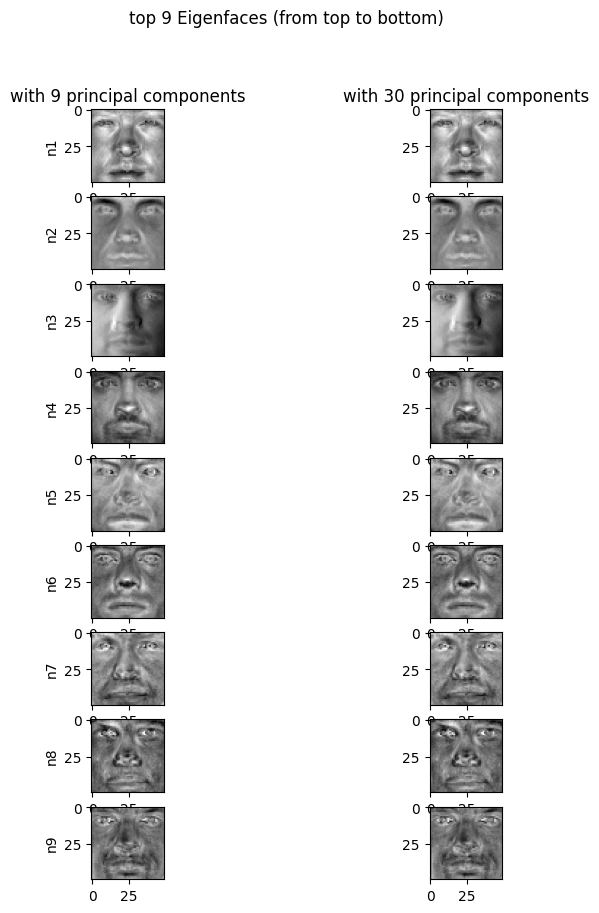

In [47]:
fig, axs = plt.subplots(9,2,figsize=(8,10))
fig.suptitle("top 9 Eigenfaces (from top to bottom)")
i=0

for i in range(0,9):
  if(i==0):
    axs[i][0].title.set_text("with 9 principal components")
  axs[i][0].set_ylabel("n"+str(i+1))
  sample=eigenvectors_9[i,:]
  axs[i][0].imshow(sample.reshape(50,50),cmap='gray')
  i+=1

for i in range(0,9):
  if(i==0):
    axs[i][1].title.set_text("with 30 principal components")
  sample=eigenvectors_30[i,:]
  axs[i][1].imshow(sample.reshape(50,50),cmap='gray')
  i+=1

Παρατήρηση: Είναι λογικό να είναι τα ίδια eigenfaces γιατί και στις δύο περιπτώσεις εκτυπώσαμε τα 9 πιο "κρίσιμα" (του ίδιου σετ). Η μέθοδος των 30 απλά περιέχει και τα επόμενα 21 για μεγαλύτερη ακρίβεια . 



#Τι θα μπορούσαμε να πούμε ότι εκφράζουν τα διαφορετικά ιδιοδιανύσματα;




Από τα δεδομένα έχει αφαιρεθεί το μέσο(τα δεδομένα είναι κεντραρισμένα) οπότε τα ιδιοδιανύσματα εκφράζουν τα σημεία στα οποία οι αντίστοιχες εικόνες διαφέρουν από αυτό . 

#IV)

In [66]:
# choose random image from each set

import random

def pick_random_image(Set,labels):
   r=random.randint(0,Set.shape[0]-1)
   img_vector=Set[r,:]
   label=labels[r]
   return img_vector,label,r

original= np.zeros(shape=(5, 2500))

img_1, label_1 ,index_1 = pick_random_image(X,y)
original[0,:]=img_1

img_2, label_2 ,index_2 = pick_random_image(X2,y2)
original[1,:]=img_2

img_3, label_3 ,index_3 = pick_random_image(X3,y3)
original[2,:]=img_3

img_4, label_4 ,index_4 = pick_random_image(X4,y4)
original[3,:]=img_4

img_5, label_5 ,index_5 = pick_random_image(X5,y5)
original[4,:]=img_5

print("The random images belong to these people:",label_1,label_2,label_3,label_4,label_5)

The random images belong to these people: 7 5 7 1 8


In [67]:
# This function constructs the img as vector

def reconstruct(img_vector,pca):
  values=pca.transform(img_vector.reshape(1,-1)) # this is the image in the eigenspace
  eigenvectors= pca.components_
  img_reconstructed = np.matmul(values , eigenvectors)
  return img_reconstructed   # flattened

constructed_30= np.zeros(shape=(5, 2500))
constructed_9= np.zeros(shape=(5, 2500))

for i in range(0,5):
  img=original[i,:]
  constructed_30[i,:] = reconstruct(img ,pca_30) 
  constructed_9[i,:] = reconstruct(img ,pca_9) 

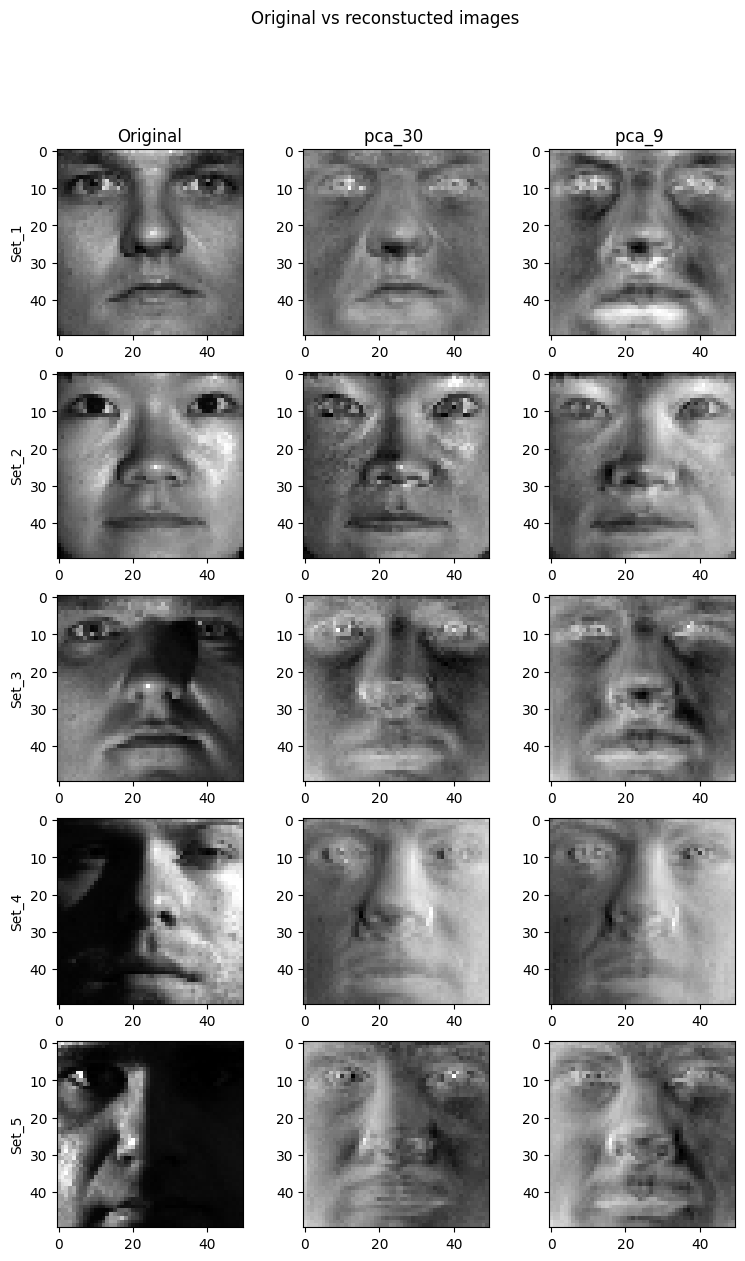

In [69]:
fig, axs = plt.subplots(5,3,figsize=(9,14))
fig.suptitle("Original vs reconstucted images")
i=0

for i in range(0,5):
  if(i==0):
    axs[i][0].title.set_text("Original")
    axs[i][1].title.set_text("pca_30 ")
    axs[i][2].title.set_text("pca_9 ")
  axs[i][0].set_ylabel("Set_"+str(i+1))
  original_img = original[i,:]
  image_30 = constructed_30[i,:]
  image_9  = constructed_9[i,:]

  axs[i][0].imshow(original_img.reshape(50,50),cmap='gray')
  axs[i][1].imshow(image_30.reshape(50,50),cmap='gray')
  axs[i][2].imshow(image_9.reshape(50,50),cmap='gray')
    
  i+=1

# Αποθηκευμένη εικόνα "Orignal vs constructed":

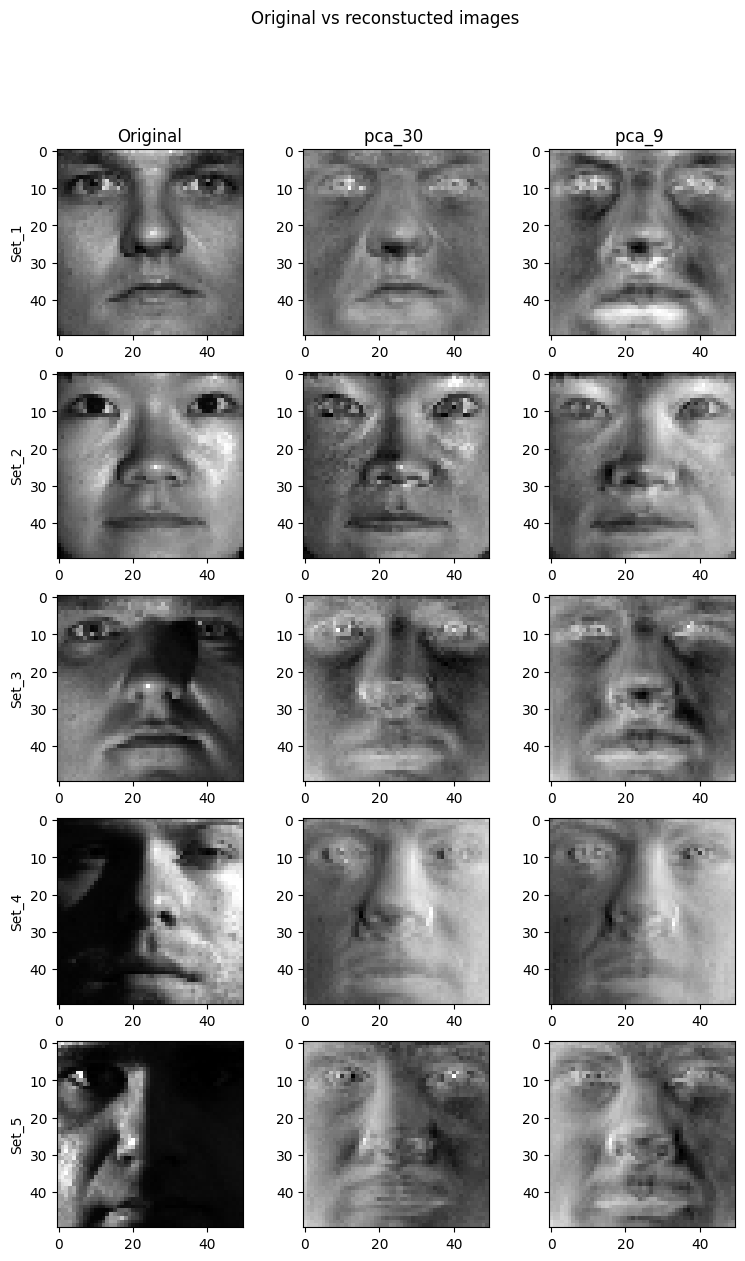

#Να σχολιάσετε την ποιότητα ανακατασκευής κάθε εικόνας.

Σημείωση: τα σχόλια αναφέρονται στις εικόνες όταν τις είχα τρέξει εγώ για αυτό και τις αποθήκευσα στο προηγούμενο κελί. 

1η Εικόνα : Παρότι ανήκει στο 1ο σετ , όπου έχουν εκπαιδευτεί τα μοντέλα δεν παρατηρούμε πολλές λεπτομέρειες . Θα μπορούσε αυτό το πρόσωπο να έχει πολλά κοινά χαρακτηριστικά με άλλα πρόσωπα για αυτό το μοντέλο να μην το διακρίνει τόσο αποτελεσματικά 

2η Εικόνα : Η φωτεινότητα παραμένει όμοια με του πρώτου σετ οπότε έχουμε ικανοποιητικό αποτέλεσμα . Μάλιστα , ίσως και καλύτερο . Αυτό γιατί στο dataset δεν υπήρχαν άλλα πρόσωπα με όμοια χαρακτηριστικά σε αντίθεση με τη πρώτη εικόνα

3η-5η: Η ποιότητα πέφτει σε αυτές τις περιπτώσεις με την 5η εικόνα να ξεχωρίζει λίγο παραπάνω στο πόσο ασαφές είναι οι νέες εικόνες . Κυρίως στη 4η και τη 5η εκεί που υπάρχουν μόνο σκιές το μοντέλο φαίνεται να δυσκολεύεται αφού δεν έχει εκπαιδευτεί έντονα σε κάτι τέτοιο και φαίνεται να είναι πιο έντονες οι διαφορές εκεί πέρα όσον αφορά τη χρήση 9 σε σχέση με 30 components. Βέβαια, έστω και ελάχιστα φαίνεται σε όλες τις εικόνες η ανώτερότητα των 30 .

#V)

In [70]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=9, random_state=8)

In [77]:
X.shape

(70, 2500)

In [80]:
svd.fit(X) # remember X=Set_1

TruncatedSVD(n_components=9, random_state=8)

#Διαφέρουν τα singular vectors από τα αντίστοιχα ιδιοδιανύσματα ; Αν ναι, γιατί;

In [82]:
print("Comparing singular values:")
print("SVD :",svd.singular_values_)
print("PCA :",pca_9.explained_variance_)

Comparing singular values:
SVD : [196.02850404  20.78144967  17.11623108  15.71374115  12.77732193
  12.27574836  11.24723084   9.19505873   9.05465601]
PCA : [20.78841138  6.18788532  4.23060397  3.04921859  2.20848788  2.0591601
  1.4442319   1.19595288  0.93693935]


Απάντηση : Ο λόγος που τα singular values έχουν μεγαλύτερες τιμές είναι ότι , όπως αναφέρεται και στο documentation , τα δεδομένα δεν είναι κεντραρισμένα , δηλαδή δεν τους έχει αφαιρεθεί το μέσο  